# The_Scholars_W7 - Predicting Student Dropout Rates Using Machine Learning

**Imports**

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier

In [2]:
students = pd.read_csv("data.csv", delimiter=";")

**Explore Data**

In [3]:
students.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


All columns are numerical so there is no need for dummies here

In [4]:
# what are the different Targets 
sum_of_unique_targets = students['Target'].value_counts()
print(sum_of_unique_targets)

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


In [5]:
# Change Column Names to lower case and replacing the space with an underscore
students.columns = students.columns.str.lower().str.strip().str.replace(' ', '_')

In [6]:
# made a subset of the data without enrolled in target
students_subset = students[students["target"] != "Enrolled"]

**Perform Train Test Split**

In [7]:
# Setting features and target
features = students.drop(columns = ["target"])
target = students["target"]

In [8]:
# size 20% random-state 0
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

**KNN Testing n= 3**

In [10]:
# distance based algorithm requires all input data to be numerical
knn = KNeighborsClassifier(n_neighbors=3)

In [11]:
# fit model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [12]:
knn.score(X_test, y_test)

0.584180790960452

Here we see that the knn score we got here isn't bad but could use improvements. 

**Triangle Visual**

In [13]:
# Exclude 'Target' column from correlation analysis
numeric_columns = students.select_dtypes(include=np.number).columns
corr = np.abs(students[numeric_columns].corr())

# Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
#print(corr)

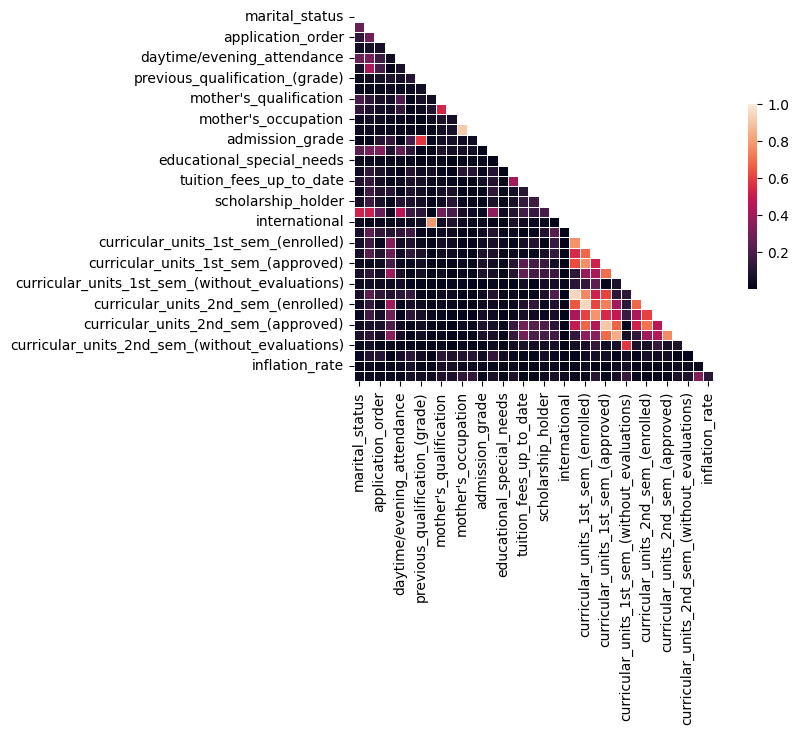

In [52]:
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

In [15]:
# taking a look at the columns to drop
students.columns

Index(['marital_status', 'application_mode', 'application_order', 'course',
       'daytime/evening_attendance', 'previous_qualification',
       'previous_qualification_(grade)', 'nacionality',
       'mother's_qualification', 'father's_qualification',
       'mother's_occupation', 'father's_occupation', 'admission_grade',
       'displaced', 'educational_special_needs', 'debtor',
       'tuition_fees_up_to_date', 'gender', 'scholarship_holder',
       'age_at_enrollment', 'international',
       'curricular_units_1st_sem_(credited)',
       'curricular_units_1st_sem_(enrolled)',
       'curricular_units_1st_sem_(evaluations)',
       'curricular_units_1st_sem_(approved)',
       'curricular_units_1st_sem_(grade)',
       'curricular_units_1st_sem_(without_evaluations)',
       'curricular_units_2nd_sem_(credited)',
       'curricular_units_2nd_sem_(enrolled)',
       'curricular_units_2nd_sem_(evaluations)',
       'curricular_units_2nd_sem_(approved)',
       'curricular_units_2nd_s

In [53]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   marital_status                                  4424 non-null   int64  
 1   application_mode                                4424 non-null   int64  
 2   application_order                               4424 non-null   int64  
 3   course                                          4424 non-null   int64  
 4   daytime/evening_attendance                      4424 non-null   int64  
 5   previous_qualification                          4424 non-null   int64  
 6   previous_qualification_(grade)                  4424 non-null   float64
 7   nacionality                                     4424 non-null   int64  
 8   mother's_qualification                          4424 non-null   int64  
 9   father's_qualification                   

After looking at the heatmap we can see that we see different columns correlating well together. We plan to drop those columns that correlate so well together so it doesn't mess up our results.

# After Analyzing Triangle Heatmap

**Train Test Split 2**

In [16]:
#columns droped because of high corralation with other variables, not the target.
drop_col= ['curricular_units_1st_sem_(credited)',
       'curricular_units_1st_sem_(enrolled)',
       'curricular_units_1st_sem_(evaluations)',
       'curricular_units_1st_sem_(approved)',
       'curricular_units_1st_sem_(grade)']

In [17]:
# new subset
students_1=students.drop(columns=drop_col)

In [18]:
# Target is only target and features is everything but target
features = students_1.drop(columns = ["target"])
target = students_1["target"]

In [19]:

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

**KNN Testing n=3 with new subset**

In [21]:
knn = KNeighborsClassifier(n_neighbors=3)

In [22]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [23]:
knn.score(X_test, y_test)

0.576271186440678

We see that after changing dropping the columns that correlated well together our knn score got a little worse from 0.584180790960452 to 0.576271186440678 (with columns dropped)

this sh*t hard -Gian

# Normalization

We are using normalization to teach the model

In [24]:
scaler = MinMaxScaler()

In [25]:
d={"Graduate":1,"Dropout":0, "Enrolled":2}
students['target'] = students['target'].map(d)

In [26]:
# Train Test Split
features = students.drop(columns = ["target"])
target = students["target"]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [27]:
scaler.fit(X_train)

MinMaxScaler()

In [28]:
X_train_scale = scaler.transform(X_train)

X_test_scale = scaler.transform(X_test)

In [29]:
X_train_scale

array([[0.        , 0.67857143, 0.11111111, ..., 1.        , 0.24444444,
        0.41479524],
       [0.        , 0.76785714, 0.11111111, ..., 1.        , 0.24444444,
        0.41479524],
       [0.2       , 0.67857143, 0.11111111, ..., 0.91860465, 0.8       ,
        0.        ],
       ...,
       [0.        , 0.        , 0.33333333, ..., 0.55813953, 0.28888889,
        0.77278732],
       [0.        , 0.        , 0.11111111, ..., 0.91860465, 0.8       ,
        0.        ],
       [0.        , 0.        , 0.11111111, ..., 0.59302326, 1.        ,
        0.31175694]])

In [30]:
X_train_scale = pd.DataFrame(X_train_scale, columns = X_train.columns)
X_train_scale.head()

,marital_status,application_mode,application_order,course,daytime/evening_attendance,previous_qualification,previous_qualification_(grade),nacionality,mother's_qualification,father's_qualification,...,curricular_units_1st_sem_(without_evaluations),curricular_units_2nd_sem_(credited),curricular_units_2nd_sem_(enrolled),curricular_units_2nd_sem_(evaluations),curricular_units_2nd_sem_(approved),curricular_units_2nd_sem_(grade),curricular_units_2nd_sem_(without_evaluations),unemployment_rate,inflation_rate,gdp
0,0.0,0.678571,0.111111,0.900783,1.0,0.0,0.473684,0.0,0.837209,0.857143,...,0.000000,0.0,0.260870,0.464286,0.25,0.673077,0.000000,1.000000,0.244444,0.414795
1,0.0,0.767857,0.111111,0.900783,1.0,0.0,0.473684,0.0,0.000000,0.000000,...,0.000000,0.0,0.260870,0.428571,0.25,0.634188,0.000000,1.000000,0.244444,0.414795
2,0.2,0.678571,0.111111,0.900783,1.0,0.0,0.401053,0.0,0.000000,0.428571,...,0.166667,0.0,0.260870,0.464286,0.00,0.000000,0.083333,0.918605,0.800000,0.000000
3,0.0,0.000000,0.111111,0.956317,1.0,0.0,0.421053,0.0,0.837209,0.880952,...,0.000000,0.0,0.347826,0.285714,0.40,0.621923,0.000000,0.593023,1.000000,0.311757
4,0.0,0.000000,0.222222,0.907512,1.0,0.0,0.326316,0.0,0.418605,0.880952,...,0.000000,0.0,0.260870,0.285714,0.30,0.666346,0.000000,0.372093,0.488889,0.766182


In [31]:
X_test_scale = pd.DataFrame(X_test_scale, columns = X_test.columns)
X_test_scale.head()

,marital_status,application_mode,application_order,course,daytime/evening_attendance,previous_qualification,previous_qualification_(grade),nacionality,mother's_qualification,father's_qualification,...,curricular_units_1st_sem_(without_evaluations),curricular_units_2nd_sem_(credited),curricular_units_2nd_sem_(enrolled),curricular_units_2nd_sem_(evaluations),curricular_units_2nd_sem_(approved),curricular_units_2nd_sem_(grade),curricular_units_2nd_sem_(without_evaluations),unemployment_rate,inflation_rate,gdp
0,0.0,0.000000,0.111111,0.915244,1.0,0.0,0.400000,0.0,0.860465,0.880952,...,0.00,0.000000,0.217391,0.285714,0.15,0.664103,0.00,0.209302,0.000000,0.124174
1,0.0,0.000000,0.111111,0.913537,1.0,0.0,0.515789,0.0,0.046512,0.000000,...,0.25,0.052632,0.217391,0.357143,0.05,0.646154,0.25,0.372093,0.488889,0.766182
2,0.0,0.000000,0.111111,0.978108,1.0,0.0,0.473684,0.0,0.418605,0.857143,...,0.00,0.000000,0.260870,0.250000,0.30,0.700000,0.00,0.372093,0.488889,0.766182
3,0.0,0.285714,0.111111,0.978108,1.0,0.0,0.431579,0.0,0.046512,0.000000,...,0.00,0.000000,0.260870,0.250000,0.30,0.673077,0.00,0.372093,0.488889,0.766182
4,0.0,0.285714,0.111111,0.915244,1.0,0.0,0.221053,0.0,0.046512,0.000000,...,0.00,0.000000,0.217391,0.392857,0.20,0.753846,0.00,0.151163,0.488889,1.000000


In [32]:
y_test

220     1
1332    0
3448    1
2905    1
841     2
       ..
2764    2
692     2
1367    1
289     1
203     1
Name: target, Length: 885, dtype: int64

**KNN Testing n =10**

In [33]:
knn = KNeighborsClassifier(n_neighbors=10)

In [34]:
knn.fit(X_train_scale, y_train)

KNeighborsClassifier(n_neighbors=10)

In [35]:
knn.score(X_test_scale, y_test)

0.7016949152542373

Here we use a higher n for our knn testing, we see an improvement when we bump the number up to 10. it when from 0.584180790960452 to 0.576271186440678 (with columns dropped) and now 0.7016949152542373

**Now normalization to teach the model without some columns**

The Columns:
        'curricular_units_1st_sem_(credited)',
       'curricular_units_1st_sem_(enrolled)',
       'curricular_units_1st_sem_(evaluations)',
       'curricular_units_1st_sem_(approved)',
       'curricular_units_1st_sem_(grade)'

In [36]:
# d={"Graduate":2,"Dropout":0, "Enrolled":1}
# students_1['target'] = students['target'].map(d)

In [37]:
# features = students_1.drop(columns = ["target"])
# target = students_1["target"]

In [38]:
# y_train

In [39]:
# from sklearn.model_selection import train_test_split


# X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [40]:
# scaler.fit(X_train)

In [41]:
# X_train_scale = scaler.transform(X_train)

# X_test_scale = scaler.transform(X_test)

In [42]:
# knn = KNeighborsRegressor(n_neighbors=10)

In [43]:
# knn.fit(X_train_scale, y_train)

# **Different Ensemble Methods**

**Decision Tree**

In [44]:
tree = DecisionTreeClassifier(max_depth=10)
tree.fit(X_train_scale, y_train)

DecisionTreeClassifier(max_depth=10)

In [45]:
pred = tree.predict(X_test_scale)

print("Accuracy:", accuracy_score(y_test, pred))
print("Recall:", recall_score(y_test, pred, average='macro'))
print("Precision:", precision_score(y_test, pred, average='macro'))

Accuracy: 0.7254237288135593
Recall: 0.6386860678419302
Precision: 0.6425570300044353


**Begging and Pasting**

In [46]:
bagging_class = BaggingClassifier(DecisionTreeClassifier(max_depth=20),
                               n_estimators=100,
                               max_samples = 1000)
bagging_class.fit(X_train_scale, y_train)
pred = bagging_class.predict(X_test_scale)
# from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
print("Accuracy:", accuracy_score(y_test, pred))
print("Recall:", recall_score(y_test, pred, average='macro'))
print("Precision:", precision_score(y_test, pred, average='macro'))

Accuracy: 0.7932203389830509
Recall: 0.7035946066390988
Precision: 0.7449805435242327


**Random Forest**

In [47]:
random_forest = RandomForestClassifier(n_estimators=100, max_depth=20, max_samples=1000)

# Train the classifier
random_forest.fit(X_train_scale, y_train)

# Make predictions on the test set
pred = random_forest.predict(X_test_scale)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, pred))
print("Recall:", recall_score(y_test, pred, average='macro'))
print("Precision:", precision_score(y_test, pred, average='macro'))

Accuracy: 0.7864406779661017
Recall: 0.6813811246186958
Precision: 0.7341119420595218


**Gradient Boosting**

In [48]:
gradient_boosting = GradientBoostingClassifier(n_estimators=100, max_depth=20, subsample=0.8)

# Train the classifier
gradient_boosting.fit(X_train_scale, y_train)

# Make predictions on the test set
pred = gradient_boosting.predict(X_test_scale)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, pred))
print("Recall:", recall_score(y_test, pred, average='macro'))
print("Precision:", precision_score(y_test, pred, average='macro'))

Accuracy: 0.7898305084745763
Recall: 0.6884366093544342
Precision: 0.742454748462353


**ADA Boost**

In [49]:
adaboost = AdaBoostClassifier(n_estimators=100, learning_rate=1.0)

# Train the classifier
adaboost.fit(X_train_scale, y_train)

# Make predictions on the test set
pred = adaboost.predict(X_test_scale)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, pred))
print("Recall:", recall_score(y_test, pred, average='macro'))
print("Precision:", precision_score(y_test, pred, average='macro'))

Accuracy: 0.7796610169491526
Recall: 0.6950680733900584
Precision: 0.7154121919012201


From running all these different models we see that Begging and Pasting gives us the best Accuracy and Precision at 0.7932203389830509 and 0.7449805435242327.

**Grid Search**

- Define hyperparameters to fine tune.

In [54]:
# Define hyperparameters to fine tune
grid = {"n_estimators": [50, 100, 200,500],
        "estimator__max_leaf_nodes": [250, 500, 1000, None],
        "estimator__max_depth":[10,30,50]}

In [55]:
ada_cla = AdaBoostClassifier(DecisionTreeClassifier())

In [58]:
model = GridSearchCV(estimator = ada_cla, param_grid = grid, cv=5)

In [59]:
model.fit(X_train_scale, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier()),
             param_grid={'estimator__max_depth': [10, 30, 50],
                         'estimator__max_leaf_nodes': [250, 500, 1000, None],
                         'n_estimators': [50, 100, 200, 500]})

- After training, we check what are the best values for the hyperparameters that we have tested.

In [60]:
best_model = model.best_estimator_

In [63]:
pred = best_model.predict(X_test_scale)

print("Accuracy", accuracy_score(pred, y_test))
print("Recall", recall_score(pred, y_test, average='macro'))
print("Precision", precision_score(y_test, pred, average="macro"))

Accuracy 0.7875706214689265
Recall 0.743410582544708
Precision 0.743410582544708


Begging and Pasting still gives us the best Accuracy and Precision at 
0.7932203389830509 and 0.7449805435242327.